In [1]:
import os
import sys
import pickle
import PIL
from PIL import Image
import io
from io import BytesIO

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
os.chdir('..')

## Filesystem Structure

In [4]:
TRAIN_PATH = 'data/original_files/train'
VAL_PATH = 'data/original_files/val'
TEST_PATH = 'data/original_files/test'

In [5]:
total = 0
for dirpath in [TRAIN_PATH, VAL_PATH, TEST_PATH]:
    print(f"{os.path.basename(dirpath).upper()}")
    print('-'*20)
    dir_total = 0
    for dirname in os.listdir(dirpath):
        file_count = len(os.listdir(os.path.join(dirpath, dirname)))
        print(f"{dirname}: {file_count} images")
        dir_total += file_count
        total += file_count
    print('')
    print(f"\t{dir_total} subtotal images")
print()
print(f"{total} images in train, test, and val")

TRAIN
--------------------
PNEUMONIA: 3875 images
NORMAL: 1341 images

	5216 subtotal images
VAL
--------------------
PNEUMONIA: 8 images
NORMAL: 8 images

	16 subtotal images
TEST
--------------------
PNEUMONIA: 390 images
NORMAL: 234 images

	624 subtotal images

5856 images in train, test, and val


In [9]:
pwd

'/Users/iansharff/Documents/flatiron_ds/phase4/project/CT_image_classifier'

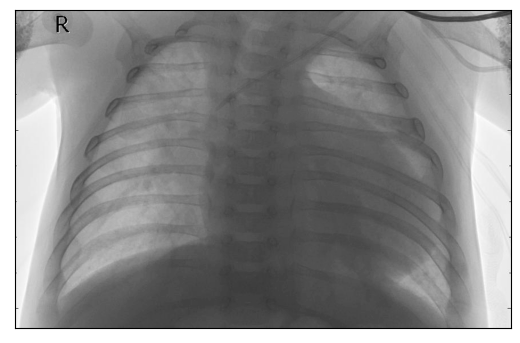

In [13]:
test_image_path = os.path.join(TRAIN_PATH, 'PEUNOMIA/person1_virus_11.jpeg')
with open(test_image_path, 'rb') as img:
    test_image = Image.open(BytesIO(img.read()))

plt.imshow(img_to_array(test_image), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [33]:
train_generator = ImageDataGenerator().flow_from_directory(TRAIN_PATH)

Found 3514 images belonging to 2 classes.


In [ ]:
train_generator.

In [14]:
for dirname, _, filenames in os.walk(TRAIN_PATH):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        with open(path, 'rb') as img:
            image = Image.open(BytesIO(img.read()))
            shape = np.asarray(image).shape
            if len(shape) != 2:
                print(os.path.join(dirname, filename), shape)

data/reorganized_files/split/train/PEUNOMIA/person69_bacteria_338.jpeg (560, 850, 3)
data/reorganized_files/split/train/PEUNOMIA/person407_virus_811.jpeg (127, 384, 3)
data/reorganized_files/split/train/PEUNOMIA/person1253_bacteria_3211.jpeg (537, 711, 3)
data/reorganized_files/split/train/PEUNOMIA/person977_virus_1652.jpeg (552, 768, 3)
data/reorganized_files/split/train/PEUNOMIA/person495_bacteria_2094.jpeg (469, 796, 3)
data/reorganized_files/split/train/PEUNOMIA/person1684_bacteria_4461.jpeg (188, 499, 3)
data/reorganized_files/split/train/PEUNOMIA/person461_virus_949.jpeg (574, 863, 3)
data/reorganized_files/split/train/PEUNOMIA/person757_virus_1385.jpeg (533, 937, 3)
data/reorganized_files/split/train/PEUNOMIA/person7_bacteria_25.jpeg (588, 932, 3)
data/reorganized_files/split/train/PEUNOMIA/person1639_bacteria_4345.jpeg (476, 781, 3)
data/reorganized_files/split/train/PEUNOMIA/person1478_bacteria_3848.jpeg (329, 647, 3)
data/reorganized_files/split/train/PEUNOMIA/person612_bacte

In [ ]:
train_counts = np.zeros(2)
test_counts = np.zeros(2)
val_counts = np.zeros(2)

for dirpath, dirnames, filename in os.walk('data'):
    for dirname in dirnames

### Baseline Neural Network Model

In [ ]:
def create_model():
    model = models.Sequential()
    
    model.add(layers.Dense())